In [1]:
import os, sys
project_dir = os.path.join(os.getcwd(),'..')
if project_dir not in sys.path:
    sys.path.append(project_dir)

source_dir = os.path.join(os.getcwd(), 'source')
if source_dir not in sys.path:
    sys.path.append(source_dir)

from source.config import *
from source.import_data import *
from source.networks import *
from source.utils import *


Random Seed:  999
Random Seed:  999


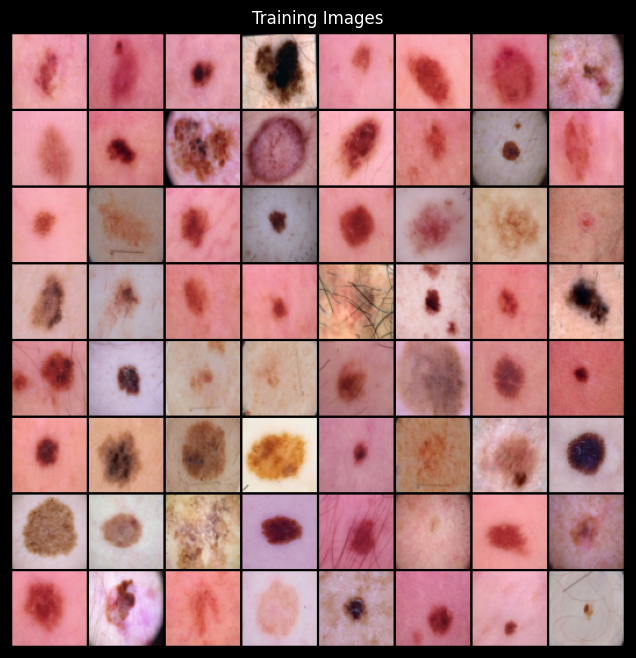

In [2]:
# Data
dataloader = import_data(batch_size, image_size, workers, dataroot)

plot_input_images(dataloader,device)

In [3]:
netG, netD = set_GAN()
optimizerD, optimizerG = set_GAN_optimizer(netG,netD)
criterion, fixed_noise, real_label, fake_label = set_GAN_loss()
#schedulerD, schedulerG = set_GAN_scheduler(optimizerD,optimizerG)
# print(netG)
# print(netD)

In [4]:
G_losses, D_losses, img_list = train_GAN(dataloader,netG,netD,optimizerD,optimizerG,criterion,real_label,fake_label,fixed_noise)

Starting Training Loop...
[0/200][0/26]	Loss_D: 1.8624	Loss_G: 4.8837	D(x): 0.5413	D(G(z)): 0.6160 / 0.0118
[1/200][0/26]	Loss_D: 0.1128	Loss_G: 15.0816	D(x): 0.9314	D(G(z)): 0.0000 / 0.0000
[2/200][0/26]	Loss_D: 2.1349	Loss_G: 27.1945	D(x): 0.9889	D(G(z)): 0.8451 / 0.0000
[3/200][0/26]	Loss_D: 1.9535	Loss_G: 21.0868	D(x): 0.4155	D(G(z)): 0.0000 / 0.0000
[4/200][0/26]	Loss_D: 0.0653	Loss_G: 3.9802	D(x): 0.9694	D(G(z)): 0.0260 / 0.0319
[5/200][0/26]	Loss_D: 0.1095	Loss_G: 6.2781	D(x): 0.9349	D(G(z)): 0.0317 / 0.0030
[6/200][0/26]	Loss_D: 0.1007	Loss_G: 4.6054	D(x): 0.9508	D(G(z)): 0.0348 / 0.0150
[7/200][0/26]	Loss_D: 0.3100	Loss_G: 6.6867	D(x): 0.9756	D(G(z)): 0.2360 / 0.0015
[8/200][0/26]	Loss_D: 0.2075	Loss_G: 4.2122	D(x): 0.9368	D(G(z)): 0.1198 / 0.0203
[9/200][0/26]	Loss_D: 3.3438	Loss_G: 6.3859	D(x): 0.1874	D(G(z)): 0.0005 / 0.0104
[10/200][0/26]	Loss_D: 0.4502	Loss_G: 2.8727	D(x): 0.8588	D(G(z)): 0.2333 / 0.0693
[11/200][0/26]	Loss_D: 0.4764	Loss_G: 3.4535	D(x): 0.8365	D(G(z)): 0

In [5]:
save_model(netG, netD, G_losses, D_losses, img_list, model_dir, model_name)
#plot_G_progress(G_losses) # pending to fix

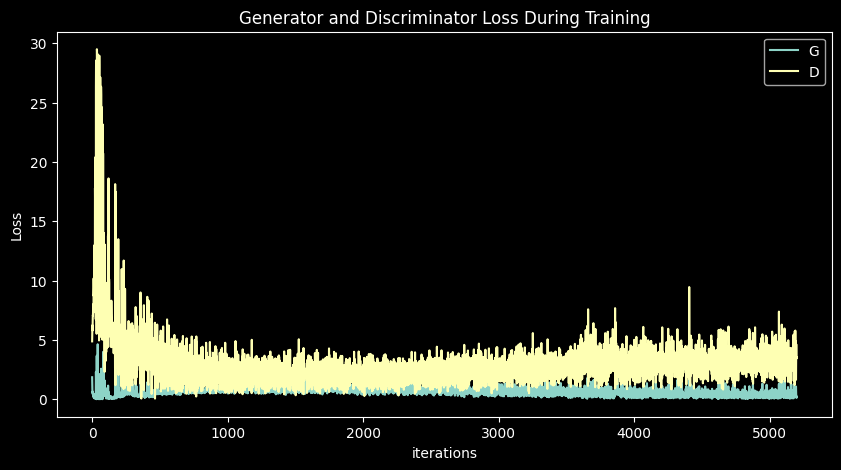

In [6]:
plot_loss(D_losses, G_losses)

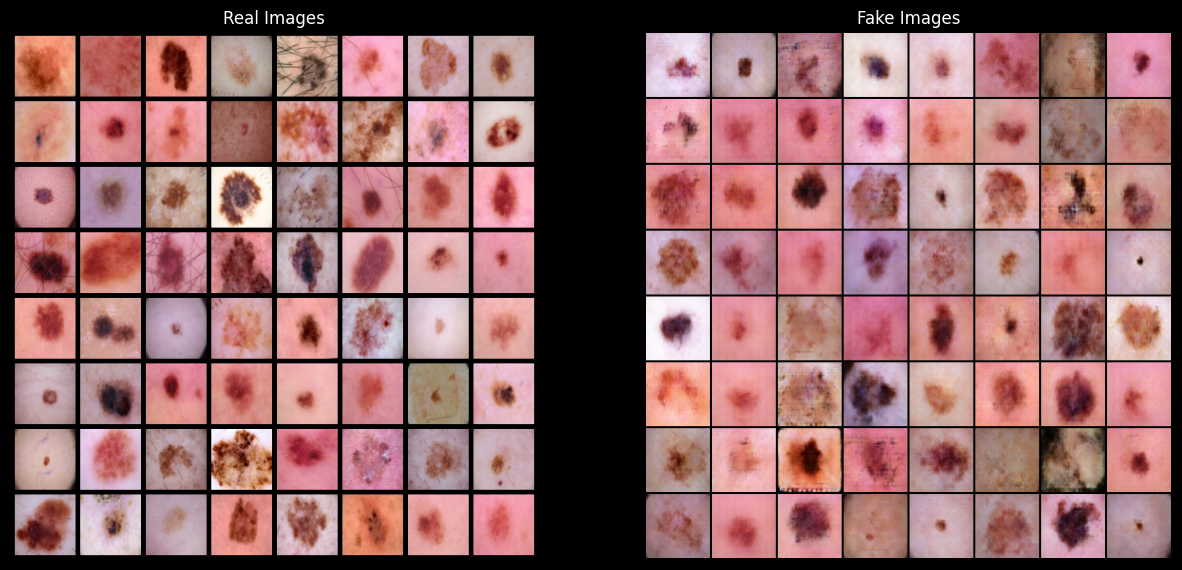

In [7]:
plot_Real_VS_Fake(dataloader,img_list)